<a href="https://colab.research.google.com/github/gabriela0821/Portafolio/blob/main/NN_Cancer_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo:**

Camilo Andres Gomez Castro

Silvia Marcela Coy Lizarazo

Gabriela Sofia Lara Moreno

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd

In [ ]:
archivocancerdemama = pd.read_csv('cancer_mama.csv')
print(archivocancerdemama)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

In [ ]:
archivocancerdemama = archivocancerdemama.drop(['842302'], axis=1)
print(archivocancerdemama)

     M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  \
0    M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
1    M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
2    M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
3    M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
4    M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089   
..  ..    ...    ...     ...     ...      ...      ...      ...      ...   
563  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
564  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
565  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
566  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
567  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   

     0.2419  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119  \
0    0.181

In [ ]:
archivor = archivocancerdemama.rename({
'M': 'Resultado', 
'17.99': 'A',
'10.38': 'B',
'122.8': 'C', 
'1001': 'D', 
'0.1184': 'E', 
'0.2776': 'F', 
'0.3001': 'G', 
'0.1471': 'H', 
'0.2419': 'I', 
'25.38': 'J', 
'17.33': 'K', 
'184.6': 'M', 
'2019': 'N', 
'0.1622': 'Ñ', 
'0.6656': 'O', 
'0.7119': 'P', 
'0.2654': 'Q', 
'0.4601': 'R', 
'0.1189': 'S'
}, axis=1)

archivor=archivor.reindex(columns=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Resultado"])
print(archivor)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

In [ ]:
archivor['Resultado'] = archivor['Resultado'].replace(['M', 'B'], [1, 0])
print(archivor)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

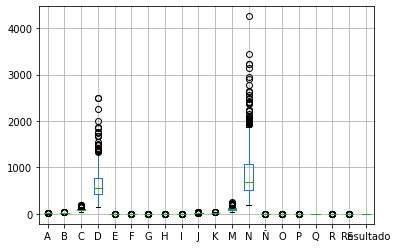

In [ ]:
archivor.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Resultado"])
print(archivor)

In [ ]:
auxc = archivor.copy(deep=True)
print(type(auxc))
print(auxc.shape)

<class 'pandas.core.frame.DataFrame'>
(568, 20)


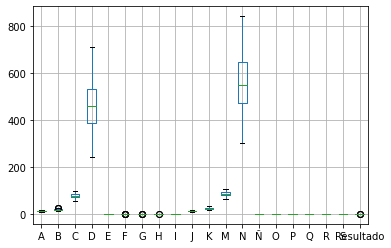

In [ ]:
import numpy as np
auxresul = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S']
for i in auxresul:
  q1 = np.percentile(auxc[i], 30, interpolation  = 'midpoint')
  q3 = np.percentile(auxc[i], 70, interpolation  = 'midpoint')
  auxiq = q3-q1
  upper = np.where(auxc[i] >= (q3 + (1.5 * auxiq)))
  lower = np.where(auxc[i] <= (q1 - (1.5 * auxiq)))

  for j in upper[0]:
    #print(j)
    auxc.drop(j, inplace = True)
  
  for j in lower[0]:
    auxc.drop(j, inplace = True)
  

  auxc.reset_index(drop=True, inplace=True)
 

auxc.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Resultado"])

In [ ]:
auxc.corr()

,A,B,C,D,E,F,G,H,I,J,K,M,N,Ñ,O,P,Q,R,S,Resultado
A,1.000000,-0.005609,0.997506,0.997047,-0.314701,-0.034383,0.057518,0.256044,-0.207418,0.958169,-0.018089,0.951494,0.955249,-0.381840,0.080753,0.106045,0.283954,-0.121438,-0.356800,0.044220
B,-0.005609,1.000000,-0.000175,0.000193,-0.017037,0.093542,0.083959,-0.035453,0.121012,0.034774,0.874765,0.034100,0.038585,-0.050286,0.029171,0.007738,-0.032740,0.040736,-0.006259,0.135325
C,0.997506,-0.000175,1.000000,0.993164,-0.275663,0.032256,0.112482,0.300117,-0.182203,0.956526,-0.013672,0.957123,0.952372,-0.352759,0.136885,0.150768,0.320312,-0.104314,-0.320718,0.042059
D,0.997047,0.000193,0.993164,1.000000,-0.339378,-0.060225,0.045085,0.237475,-0.219930,0.957961,-0.013054,0.949612,0.960197,-0.400032,0.062588,0.092691,0.265920,-0.135851,-0.364988,0.046754
E,-0.314701,-0.017037,-0.275663,-0.339378,1.000000,0.658501,0.310586,0.490234,0.348351,-0.305992,0.004822,-0.281194,-0.328895,0.779956,0.267612,0.146721,0.294498,0.163069,0.373380,-0.006709
F,-0.034383,0.093542,0.032256,-0.060225,0.658501,1.000000,0.728406,0.648420,0.368588,-0.021662,0.072893,0.064203,-0.045984,0.484360,0.762338,0.558215,0.514461,0.208385,0.517482,-0.060153
G,0.057518,0.083959,0.112482,0.045085,0.310586,0.728406,1.000000,0.711139,0.279085,0.062945,0.072670,0.140887,0.051078,0.244044,0.660323,0.833873,0.621625,0.164990,0.368708,0.012152
H,0.256044,-0.035453,0.300117,0.237475,0.490234,0.648420,0.711139,1.000000,0.260195,0.242453,-0.046194,0.288045,0.224132,0.333795,0.443135,0.479268,0.778983,0.061551,0.136770,0.067316
I,-0.207418,0.121012,-0.182203,-0.219930,0.348351,0.368588,0.279085,0.260195,1.000000,-0.178156,0.124896,-0.141374,-0.197668,0.300239,0.258997,0.225623,0.241137,0.655785,0.167581,-0.024387
J,0.958169,0.034774,0.956526,0.957961,-0.305992,-0.021662,0.062945,0.242453,-0.178156,1.000000,0.063681,0.987660,0.996244,-0.320753,0.133022,0.158243,0.332841,-0.061549,-0.297564,0.093444


In [ ]:
x=auxc[[ "A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S"]]
y=auxc[[ "Resultado"]]
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.6)
print(len(X_train))
clf = MLPClassifier(max_iter=200).fit(X_train, y_train)
clf.score(X_test, y_test)

125


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9761904761904762